In [46]:
df = get_bars(security="600519.XSHG", count=5000, unit='1d',
         fields=['date','open','high','low','close','volume','money'],
         include_now=False, end_dt=None, fq_ref_date=None, df=True)

In [50]:
print(df.head())
print(df.shape)

         date  open   high    low  close     volume       money
0  2005-01-04  36.4  36.80  36.00  36.45   234881.0   8566179.0
1  2005-01-05  36.4  37.28  36.23  37.24   613933.0  22582400.0
2  2005-01-06  37.0  37.10  36.50  36.60   552372.0  20282548.0
3  2005-01-07  36.5  37.20  36.50  36.90   300274.0  11115440.0
4  2005-01-10  36.9  38.30  36.90  38.25  1071811.0  40597723.0
(3902, 7)


In [38]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
os.getcwd()

'/home/jquser'

In [10]:
df.to_csv('Maotai_data.csv')

In [48]:
data = df.iloc[:,1:]
data['label'] = data['close'].shift(-1)
data = data.dropna()

In [49]:
print(data.head())
print(data.shape)

   open   high    low  close     volume       money  label
0  36.4  36.80  36.00  36.45   234881.0   8566179.0  37.24
1  36.4  37.28  36.23  37.24   613933.0  22582400.0  36.60
2  37.0  37.10  36.50  36.60   552372.0  20282548.0  36.90
3  36.5  37.20  36.50  36.90   300274.0  11115440.0  38.25
4  36.9  38.30  36.90  38.25  1071811.0  40597723.0  38.30
(3901, 7)


In [35]:
# Z-score标准化数据
dt = (data - np.mean(data,axis=0))/np.std(data,axis=0)
dt.tail()

,open,high,low,close,volume,money,label
3897,3.551379,3.571170,3.591217,3.614725,2.093790,7.117960,3.735271
3898,3.632389,3.576433,3.615579,3.580568,0.361795,3.281544,3.620591
3899,3.586373,3.546366,3.592790,3.537806,0.237171,2.974994,3.586388
3900,3.529508,3.483472,3.480482,3.433456,0.891969,4.331307,3.543570
3901,3.452959,3.399656,3.365318,3.311155,0.846453,4.102224,3.439081


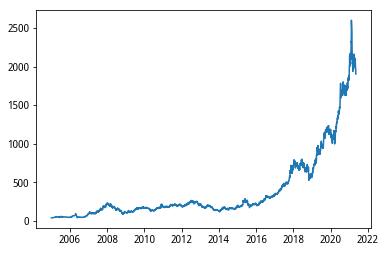

In [52]:
plt.plot(df['date'],df['close'])

In [54]:
dt[::-1].head()

,open,high,low,close,volume,money,label
3901,3.452959,3.399656,3.365318,3.311155,0.846453,4.102224,3.439081
3900,3.529508,3.483472,3.480482,3.433456,0.891969,4.331307,3.543570
3899,3.586373,3.546366,3.592790,3.537806,0.237171,2.974994,3.586388
3898,3.632389,3.576433,3.615579,3.580568,0.361795,3.281544,3.620591
3897,3.551379,3.571170,3.591217,3.614725,2.093790,7.117960,3.735271


In [56]:
# 调用库 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers

Using TensorFlow backend.


In [59]:
array = df[['close']]
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)

In [60]:
# 用过去50天预测未来5天；The Test set will be the last k (num_periods) periods we want test the model.
look_back = 50
forward_days = 5
# num_periods = 40

'''
#split in Train and Test
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]
'''

In [61]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [62]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(2918, 50, 1)
(730, 50, 1)
(40, 50, 1)
(2918, 5)
(730, 5)
(40, 5)


Train on 2918 samples, validate on 730 samples
Epoch 1/70
2918/2918 [==============================] - 51s 18ms/step - loss: 0.0487 - acc: 0.2001 - val_loss: 0.0162 - val_acc: 0.1986
Epoch 2/70
2918/2918 [==============================] - 44s 15ms/step - loss: 0.0163 - acc: 0.1916 - val_loss: 0.0086 - val_acc: 0.1425
Epoch 3/70
2918/2918 [==============================] - 45s 15ms/step - loss: 0.0118 - acc: 0.2073 - val_loss: 0.0069 - val_acc: 0.1808
Epoch 4/70
2918/2918 [==============================] - 44s 15ms/step - loss: 0.0109 - acc: 0.2039 - val_loss: 0.0063 - val_acc: 0.2781
Epoch 5/70
2918/2918 [==============================] - 43s 15ms/step - loss: 0.0100 - acc: 0.1995 - val_loss: 0.0063 - val_acc: 0.1726
Epoch 6/70
2918/2918 [==============================] - 44s 15ms/step - loss: 0.0096 - acc: 0.1957 - val_loss: 0.0054 - val_acc: 0.1644
Epoch 7/70
2918/2918 [==============================] - 44s 15ms/step - loss: 0.0094 - acc: 0.2073 - val_loss: 0.0058 - val_acc: 0.1658
E

2918/2918 [==============================] - 41s 14ms/step - loss: 0.0072 - acc: 0.1933 - val_loss: 0.0048 - val_acc: 0.2027
Epoch 61/70
2918/2918 [==============================] - 41s 14ms/step - loss: 0.0073 - acc: 0.2077 - val_loss: 0.0048 - val_acc: 0.2096
Epoch 62/70
2918/2918 [==============================] - 42s 14ms/step - loss: 0.0071 - acc: 0.2056 - val_loss: 0.0048 - val_acc: 0.2027
Epoch 63/70
2918/2918 [==============================] - 42s 14ms/step - loss: 0.0072 - acc: 0.1861 - val_loss: 0.0049 - val_acc: 0.2041
Epoch 64/70
2918/2918 [==============================] - 42s 14ms/step - loss: 0.0072 - acc: 0.1950 - val_loss: 0.0049 - val_acc: 0.2123
Epoch 65/70
2918/2918 [==============================] - 41s 14ms/step - loss: 0.0070 - acc: 0.1984 - val_loss: 0.0049 - val_acc: 0.2178
Epoch 66/70
2918/2918 [==============================] - 41s 14ms/step - loss: 0.0071 - acc: 0.1926 - val_loss: 0.0049 - val_acc: 0.2205
Epoch 67/70
2918/2918 [==============================

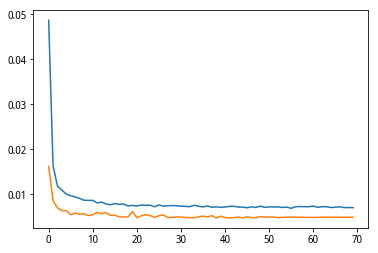

In [65]:
# train the LSTM
#### 建模部分 ####
model = keras.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1:])))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5)) #用于预测未来5天

model.compile(optimizer=keras.optimizers.Adam(), loss='mae',metrics=['accuracy'])
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.7, min_lr=0.000000005)

history = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs=70,
                    validation_data=(X_validate, y_validate),
                    callbacks=[learning_rate_reduction])

# loss变化趋势可视化
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.show()

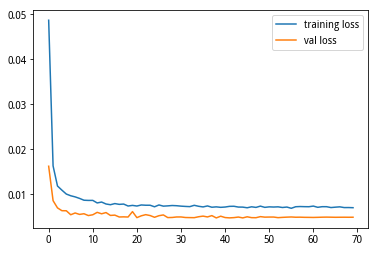

In [82]:
# loss变化趋势可视化
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

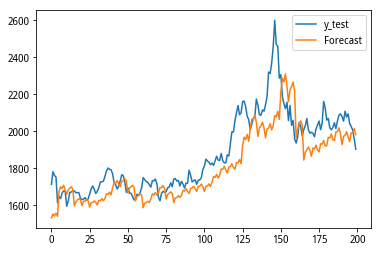

In [76]:
#### 预测结果分析&可视化 #### 

closing_price = model.predict(X_test)
fig = plt.gcf()
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)),label='y_test') # 逆归一化
plt.plot(scl.inverse_transform(closing_price.reshape(-1,1)),label='Forecast')
plt.legend()

In [73]:
# T检验中的差值统计，查看差值序列在统计挺行上的综合表现
a = y_test.reshape(-1,1)
b = closing_price.reshape(-1,1)
c = a - b #实际值减去预测值
c = pd.DataFrame(c)
c.describe()

,0
count,200.000000
mean,0.027611
std,0.041390
min,-0.101287
25%,0.004437
50%,0.026771
75%,0.047263
max,0.201156


In [79]:
# 均方误差
from sklearn.metrics import mean_absolute_error
RMS = mean_absolute_error(y_test.reshape(-1, 1), closing_price.reshape(-1,1))

print(RMS)

0.03754420550005824
